# Neural Networks

## XNOR

In [1]:
import numpy as np
from si.data import Dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[1], [0], [0], [1]])
dataset = Dataset(X,y,['X1','X2'],'X1 XNOR X2')

In [2]:
dataset.toDataframe()

X1  X2  X1 XNOR X2
0   0   0           1
1   0   1           0
2   1   0           0
3   1   1           1

In [3]:
from si.supervised.nn import NN, Dense, Activation
from si.util.activation import Sigmoid
from si.util.metrics import cross_entropy, cross_entropy_prime

In [4]:
# layer1 weights
w1 = np.array([[20,-20],[20,-20]])
b1 = np.array([[-30, 10]])
l1 = Dense(2, 2)
l1.setWeights(w1,b1)

In [5]:
# layer2 weights
w2 = np.array([[20],[20]])
b2 = np.array([[-10]])
l2 = Dense(2, 1)
l2.setWeights(w2,b2)

In [6]:
# Build the NN
nn = NN()
nn.add(l1)
nn.add(Activation(Sigmoid()))
nn.add(l2)
nn.add(Activation(Sigmoid()))
# pass the info that the model is fitted
nn.is_fited = True

In [7]:
np.round(nn.predict(dataset.X))

array([[1.],
       [0.],
       [0.],
       [1.]])

In [8]:
nn.cost(dataset.X,dataset.Y)

2.066588540474394e-09

## Train the model using backpropagation

In [9]:
nn2 = NN(epochs=100000,lr=0.1, verbose=False)
nn2.add(Dense(2, 2))
nn2.add(Activation(Sigmoid()))
nn2.add(Dense(2, 1))
nn2.add(Activation(Sigmoid()))
# use cross entropy instead of MSE as loss function
# nn2.use(cross_entropy,cross_entropy_prime)

In [10]:
nn2.fit(dataset)

 epoch 1/100000 error = 0.2550002442093606
 epoch 2/100000 error = 0.2548044641377582
 epoch 3/100000 error = 0.2546162103849759
 epoch 4/100000 error = 0.2544352136829205
 epoch 5/100000 error = 0.2542612127990375
 epoch 6/100000 error = 0.2540939544257641
 epoch 7/100000 error = 0.25393319305974976
 epoch 8/100000 error = 0.2537786908721248
 epoch 9/100000 error = 0.25363021757101334
 epoch 10/100000 error = 0.25348755025739983
 epoch 11/100000 error = 0.2533504732753772
 epoch 12/100000 error = 0.2532187780577303
 epoch 13/100000 error = 0.25309226296772913
 epoch 14/100000 error = 0.25297073313794066
 epoch 15/100000 error = 0.252854000306797
 epoch 16/100000 error = 0.25274188265359565
 epoch 17/100000 error = 0.25263420463254876
 epoch 18/100000 error = 0.25253079680643953
 epoch 19/100000 error = 0.25243149568039225
 epoch 20/100000 error = 0.25233614353621214
 epoch 21/100000 error = 0.2522445882677052
 epoch 22/100000 error = 0.25215668321734397
 epoch 23/100000 error = 0.2520

In [11]:
np.round(nn2.predict(X))

array([[1.],
       [0.],
       [0.],
       [1.]])

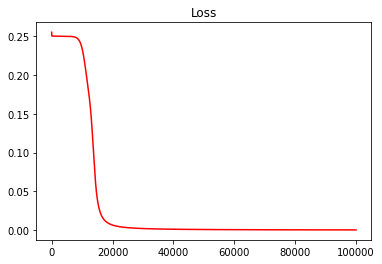

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(nn2.history.keys()), list(nn2.history.values()), '-', color='red')
plt.title('Loss')
plt.show()

In [13]:
np.round(nn2.predict(dataset.X))

array([[1.],
       [0.],
       [0.],
       [1.]])

In [14]:
nn2.cost(dataset.X,dataset.Y)

0.00032066938480487496